In [1]:
import glob
import numpy as np
import scipy as sc
from PIL import Image
import os
import matplotlib.image as img
from sklearn.decomposition import PCA as pca
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

    BELOW CELLS ARE FOR LOADING THE IMAGE.

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        images.append(img)
    return images

In [3]:
imageslist = load_images_from_folder('lfwdataset/')

In [4]:
imagesmatrix = np.array([img.imread('lfwdataset/' + name) for name in os.listdir('lfwdataset/')], dtype=np.float64)

In [12]:
data2 = np.reshape(imagesmatrix, (1000,4096))

IF WE USE SVD INSTEAD OF PCA, WE WILL HAVE 3 VECTORS U,S,V WHICH U WILL BE EIGENVECTORS AND IN THIS CASE EIGENFACES
BELOW CELLS ARE FOR DIFFERENT K VALUES FINDING EXPLAINED VARIANCES

In [60]:
yaxis = []

In [96]:
model = pca(n_components=240)
normalizedimg = normalize(data2)
model.fit(normalizedimg)
pcaimg = model.transform(normalizedimg)

In [62]:
variance_ratio16 = model.explained_variance_ratio_
variance_ratio16 = variance_ratio16.cumsum()
total16 = variance_ratio16.max()
yaxis.append(total16)

In [64]:
variance_ratio32 = model.explained_variance_ratio_
variance_ratio32 = variance_ratio32.cumsum()
total32 = variance_ratio32.max()
yaxis.append(total32)

In [66]:
variance_ratio64 = model.explained_variance_ratio_
variance_ratio64 = variance_ratio64.cumsum()
total64 = variance_ratio64.max()
yaxis.append(total64)

In [68]:
variance_ratio128 = model.explained_variance_ratio_
variance_ratio128 = variance_ratio128.cumsum()
total128 = variance_ratio128.max()
yaxis.append(total128)

In [86]:
variance_ratio256 = model.explained_variance_ratio_
variance_ratio256 = variance_ratio256.cumsum()
total256 = variance_ratio256.max()
yaxis.append(total256)

In [70]:
variance_ratio512 = model.explained_variance_ratio_
variance_ratio512 = variance_ratio512.cumsum()
total512 = variance_ratio512.max()
yaxis.append(total512)

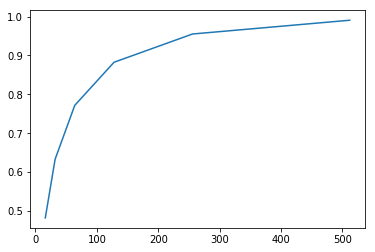

In [89]:
yaxis.sort()
plt.plot([16,32,64,128,256,512], yaxis)

In [40]:
reconstructedimg512 = model.inverse_transform(pcaimg)

In [37]:
reconstructedimg128 = model.inverse_transform(pcaimg)

In [35]:
reconstructedimg32 = model.inverse_transform(pcaimg)

WE CAN ESTIMATE ORIGINAL DATA FROM PCA BY DOT PRODUCTING PROJECTIONS WITH THE EIGENVECTORS, LUCKILY SKLEARN DOES IT FOR US WITH INVERSE_TRANSFORM METHOD. BELOW IS THE FACES PLOTTED, FIRST ROW ORIGINAL, SECOND ROW EIGENFACES, OTHER ROWS RECONSTRUCTED IMAGES WITH K = 32,128,512 RESPECTIVELY

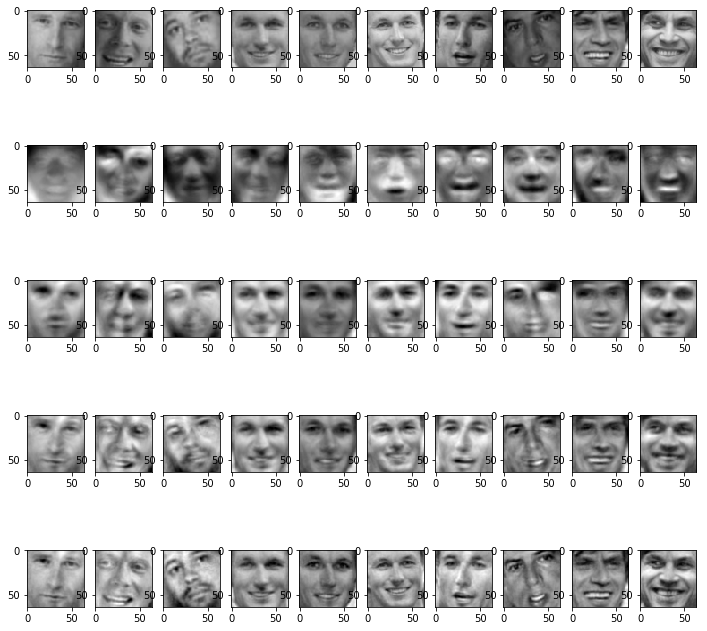

In [100]:
fig, ax = plt.subplots(5,10, figsize=(12,12))
for k in range(5):
    if k == 0: 
        for i in range(10):
            ord = model.components_[i]
            img = ord.reshape(64,64)
            recimg = pts3[i].reshape(64,64)
            ax[k][i].imshow(imageslist[i],cmap='gray')
    if k == 1: 
        for i in range(10):
            ord = model.components_[i]
            img = ord.reshape(64,64)
            recimg = pts3[i].reshape(64,64)
            ax[k][i].imshow(img,cmap='gray')
    if k == 2: 
        for i in range(10):
            recimg = reconstructedimg32[i].reshape(64,64)
            ax[k][i].imshow(recimg,cmap='gray')
    if k == 3: 
        for i in range(10):
            recimg = reconstructedimg128[i].reshape(64,64)
            ax[k][i].imshow(recimg,cmap='gray')
    if k == 4: 
        for i in range(10):
            recimg = reconstructedimg512[i].reshape(64,64)
            ax[k][i].imshow(recimg,cmap='gray')

MINIMUM NUMBER OF K REQUIRED TO GET 95 PERCENT VARIANCE IS 240 AS SEEN BELOW

In [97]:
a = model.explained_variance_ratio_

In [98]:
a.cumsum().max()

0.9501205701949395